In [13]:
import pandas as pd

population = pd.read_parquet("population.parquet")

shipment = pd.read_parquet("shipment_eda.parquet")

vitalstats_temp = pd.read_csv(
    "https://raw.githubusercontent.com/MIDS-at-Duke/Opioid-Team-Project-Group-9/main/Data/processed/vitalstats_temp.csv?token=GHSAT0AAAAAACHBMRNAMCZGI2SNNMC6WB5EZLFGXHA"
)

In [48]:
required_cases = [
    "Drug poisonings (overdose) Unintentional (X40-X44)",
    "All other drug-induced causes",
    "Drug poisonings (overdose) Suicide (X60-X64)",
    "Drug poisonings (overdose) Undetermined (Y10-Y14)",
    "Drug poisonings (overdose) Homicide (X85)",
]
vitalstats_temp["if_drugdose"] = vitalstats_temp["Drug/Alcohol Induced Cause"].isin(
    required_cases
)

In [49]:
vitalstats_temp[vitalstats_temp["County"] == "Clifton Forge city"]

,Unnamed: 0,County,County Code,Year,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,State,if_drugdose
56666,4424,Clifton Forge city,51560,2015,Drug poisonings (overdose) Unintentional (X40-...,D1,Missing,VA,True
56667,4425,Clifton Forge city,51560,2015,Drug poisonings (overdose) Suicide (X60-X64),D2,Missing,VA,True
56668,4426,Clifton Forge city,51560,2015,Drug poisonings (overdose) Homicide (X85),D3,Missing,VA,True
56669,4427,Clifton Forge city,51560,2015,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,Missing,VA,True
56670,4428,Clifton Forge city,51560,2015,All other drug-induced causes,D9,Missing,VA,True
56671,4429,Clifton Forge city,51560,2015,"Alcohol poisonings (overdose) (X45, X65, Y15)",A1,Missing,VA,False
56672,4430,Clifton Forge city,51560,2015,All other alcohol-induced causes,A9,Missing,VA,False
56673,4431,Clifton Forge city,51560,2015,All other non-drug and non-alcohol causes,O9,Missing,VA,False


In [67]:
from itertools import product

counties = vitalstats_temp["County"].unique()
years = vitalstats_temp["Year"].unique()
causes = vitalstats_temp["Drug/Alcohol Induced Cause"].unique()
all_combinations = pd.DataFrame(
    list(product(counties, years, causes)),
    columns=["County", "Year", "Drug/Alcohol Induced Cause"],
)
missing_records = pd.merge(
    all_combinations,
    vitalstats_temp,
    on=["County", "Year", "Drug/Alcohol Induced Cause"],
    how="left",
)
missing_records["Deaths"].fillna(5, inplace=True)
missing_records["State"] = missing_records.groupby("County")["State"].transform(
    lambda x: x.fillna(x.mode().iloc[0])
)
missing_records["County Code"] = missing_records.groupby("County")[
    "County Code"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
missing_records["Drug/Alcohol Induced Cause Code"] = missing_records.groupby("County")[
    "Drug/Alcohol Induced Cause Code"
].transform(lambda x: x.fillna(x.mode().iloc[0]))
vitalstats_temp = missing_records

In [82]:
vitalstats_temp.head()
# na_count_county_code = vitalstats_temp.isna().sum()

,County,Year,Drug/Alcohol Induced Cause,Unnamed: 0,County Code,Drug/Alcohol Induced Cause Code,Deaths,State,if_drugdose
0,Autauga County,2003,All other non-drug and non-alcohol causes,0.0,01001,O9,397.0,AL,False
1,Autauga County,2003,Drug poisonings (overdose) Unintentional (X40-...,NaN,01001,O9,5,AL,NaN
2,Autauga County,2003,All other alcohol-induced causes,NaN,01001,O9,5,AL,NaN
3,Autauga County,2003,All other drug-induced causes,NaN,01001,O9,5,AL,NaN
4,Autauga County,2003,Drug poisonings (overdose) Suicide (X60-X64),NaN,01001,O9,5,AL,NaN


In [18]:
# drop NA for county code for now, will adjust as needs be
# vitalstats_temp = vitalstats_temp.dropna(subset=["County Code"])

In [84]:
vitalstats_temp["County Code"] = vitalstats_temp["County Code"].astype(int)
vitalstats_temp["County Code"] = vitalstats_temp["County Code"].astype(str).str.zfill(5)
vitalstats_temp

,County,Year,Drug/Alcohol Induced Cause,Unnamed: 0,County Code,Drug/Alcohol Induced Cause Code,Deaths,State,if_drugdose
0,Autauga County,2003,All other non-drug and non-alcohol causes,0.0,01001,O9,397.0,AL,False
1,Autauga County,2003,Drug poisonings (overdose) Unintentional (X40-...,NaN,01001,O9,5,AL,NaN
2,Autauga County,2003,All other alcohol-induced causes,NaN,01001,O9,5,AL,NaN
3,Autauga County,2003,All other drug-induced causes,NaN,01001,O9,5,AL,NaN
4,Autauga County,2003,Drug poisonings (overdose) Suicide (X60-X64),NaN,01001,O9,5,AL,NaN
...,...,...,...,...,...,...,...,...,...
210181,Clifton Forge city,2015,All other drug-induced causes,4428.0,51560,D9,Missing,VA,True
210182,Clifton Forge city,2015,Drug poisonings (overdose) Suicide (X60-X64),4425.0,51560,D2,Missing,VA,True
210183,Clifton Forge city,2015,Drug poisonings (overdose) Undetermined (Y10-Y14),4427.0,51560,D4,Missing,VA,True
210184,Clifton Forge city,2015,"Alcohol poisonings (overdose) (X45, X65, Y15)",4429.0,51560,A1,Missing,VA,False


In [86]:
merged_vital_pop = pd.merge(
    vitalstats_temp,
    population,
    left_on=["County Code", "Year"],
    right_on=["County_Code", "Year"],
    how="left",
)
full_table = pd.merge(
    merged_vital_pop,
    shipment,
    left_on=["County_y", "Year"],
    right_on=["BUYER_COUNTY", "YEAR"],
    how="left",
)

In [87]:
na_count_county_code = full_table.isna().sum()
na_count_county_code

County_x                                0
Year                                    0
Drug/Alcohol Induced Cause              0
Unnamed: 0                         232546
County Code                             0
Drug/Alcohol Induced Cause Code         0
Deaths                                  0
State_x                                 0
if_drugdose                        232546
State_y                               104
State_Code                            104
County_y                              104
County_Code                           104
Population                            104
BUYER_STATE                         53958
BUYER_COUNTY                        53958
YEAR                                53958
MME                                 53958
dtype: int64

In [108]:
# getting "Georgia", "Louisiana", "North Carolina", "Florida"
required_states = ["Georgia", "Louisiana", "North Carolina", "Florida"]
full_table["if_required_states"] = full_table["State_y"].isin(required_states)
# getting year of interest from 2007 to 2013
required_year = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]
full_table["if_year"] = full_table["Year"].isin(required_year)
# create sub table for Florida and control states from year 2007 to 2013
Florida_others = full_table[
    (full_table["if_required_states"] == True)
    & (full_table["if_year"] == True)
    & (full_table["if_drugdose"] == True)
]

Florida_others["Deaths"] = pd.to_numeric(Florida_others["Deaths"], errors="coerce")
Florida_others = Florida_others[
    ["State_y", "County_y", "County_Code", "Year", "MME", "Population", "Deaths"]
]


# data_types = Florida_others.dtypes

/var/folders/10/f1qn8xhx4sdfq2brlk2shcxw0000gn/T/ipykernel_99964/4001458943.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Florida_others["Deaths"] = pd.to_numeric(Florida_others["Deaths"], errors="coerce")


In [115]:
Florida_others["Opioid Prescriptions Per Capita"] = (
    Florida_others["MME"] / Florida_others["Population"]
)
Florida_others["Mortality rate from Drug Overdoses Per Capita"] = (
    Florida_others["Deaths"] / Florida_others["Population"]
)

In [116]:
control_list = ["Georgia", "Louisiana", "North Carolina"]
control_states = Florida_others[Florida_others["State_y"].isin(control_list) == True]
Florida = Florida_others[Florida_others["State_y"] == "Florida"]
group_florida = (
    Florida.groupby("Year")[
        [
            "Opioid Prescriptions Per Capita",
            "Mortality rate from Drug Overdoses Per Capita",
        ]
    ]
    .mean()
    .reset_index()
)

group_control = (
    control_states.groupby("Year")[
        [
            "Opioid Prescriptions Per Capita",
            "Mortality rate from Drug Overdoses Per Capita",
        ]
    ]
    .mean()
    .reset_index()
)

group_control

,Year,Opioid Prescriptions Per Capita,Mortality rate from Drug Overdoses Per Capita
0,2006,156.900787,0.000141
1,2007,277.733431,0.000162
2,2008,212.273336,0.000124
3,2009,275.755040,0.000138
4,2010,312.662675,0.000129
5,2011,409.141559,0.000151
6,2012,364.138316,0.000137
7,2013,295.073999,0.000147


In [117]:
group_florida

,Year,Opioid Prescriptions Per Capita,Mortality rate from Drug Overdoses Per Capita
0,2006,190.575710,0.000097
1,2007,231.470535,0.000106
2,2008,287.029437,0.000110
3,2009,334.198363,0.000104
4,2010,434.685699,0.000132
5,2011,373.263691,0.000123
6,2012,266.689503,0.000099
7,2013,232.993127,0.000097


In [112]:
result_df = pd.concat([group_florida, group_control], ignore_index=True)
result_df["if_treat"] = result_df.index.map(lambda x: 1 if x <= 6 else 0)
result_df["if_effect"] = result_df["Year"].apply(lambda x: 0 if x < 2010 else 1)
result_df.columns = [
    "year",
    "Opioid_Prescriptions_Per_Capita",
    "Mortality_rate_from_Drug_Overdoses_Per_Capita",
    "if_treat",
    "if_effect",
]

result_df

,year,Opioid_Prescriptions_Per_Capita,Mortality_rate_from_Drug_Overdoses_Per_Capita,if_treat,if_effect
0,2006,190.575710,0.000097,1,0
1,2007,231.470535,0.000106,1,0
2,2008,287.029437,0.000110,1,0
3,2009,334.198363,0.000104,1,0
4,2010,434.685699,0.000132,1,1
5,2011,373.263691,0.000123,1,1
6,2012,266.689503,0.000099,1,1
7,2013,232.993127,0.000097,0,1
8,2006,156.900787,0.000141,0,0
9,2007,277.733431,0.000162,0,0


/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(24.640625000000007, 0.5, 'Opioid_Prescriptions_Per_Capita')

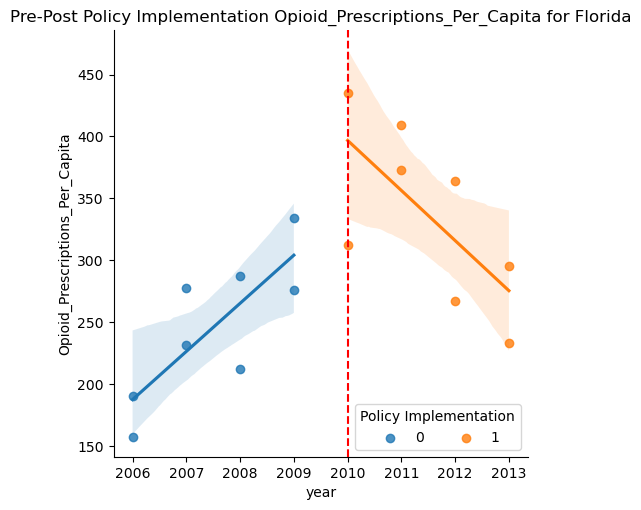

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.lmplot(
    data=result_df,
    x="year",
    y="Opioid_Prescriptions_Per_Capita",
    hue="if_effect",
    legend=False,
)
plot.set(
    title=f"Pre-Post Policy Implementation Opioid_Prescriptions_Per_Capita for Florida"
)

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]
policy_year = 2010
ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Opioid_Prescriptions_Per_Capita")

/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-6.359374999999991, 0.5, 'Mortality Rate Per-Capita')

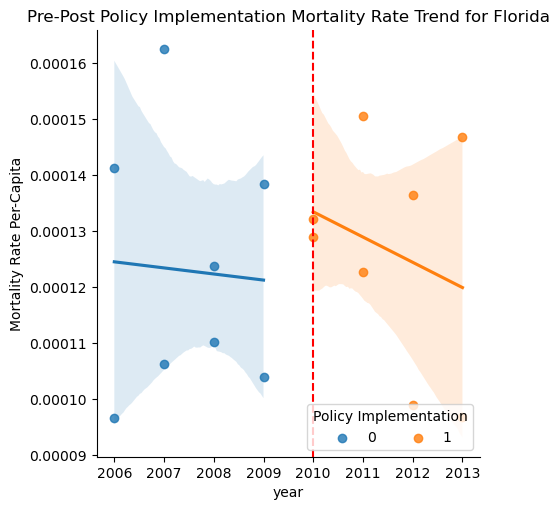

In [130]:
plot = sns.lmplot(
    data=result_df,
    x="year",
    y="Mortality_rate_from_Drug_Overdoses_Per_Capita",
    hue="if_effect",
    legend=False,
)
plot.set(title=f"Pre-Post Policy Implementation Mortality Rate Trend for Florida")

plt.legend(
    loc="lower right",
    # bbox_to_anchor=(0.5, -0.15),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]
policy_year = 2010
ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

In [131]:
result_df.head()

,year,Opioid_Prescriptions_Per_Capita,Mortality_rate_from_Drug_Overdoses_Per_Capita,if_treat,if_effect
0,2006,190.575710,0.000097,1,0
1,2007,231.470535,0.000106,1,0
2,2008,287.029437,0.000110,1,0
3,2009,334.198363,0.000104,1,0
4,2010,434.685699,0.000132,1,1


In [139]:
result_df["if_treat"] = result_df["if_treat"].astype(str)
result_df["if_effect"] = result_df["if_effect"].astype(str)
result_df["hue_separator"] = result_df["if_treat"] + result_df["if_effect"]
# df['NewColumn'] = df['Column1'] + df['Column2']

,year,Opioid_Prescriptions_Per_Capita,Mortality_rate_from_Drug_Overdoses_Per_Capita,if_treat,if_effect,hue_separator
0,2006,190.575710,0.000097,1,0,10
1,2007,231.470535,0.000106,1,0,10
2,2008,287.029437,0.000110,1,0,10
3,2009,334.198363,0.000104,1,0,10
4,2010,434.685699,0.000132,1,1,11
5,2011,373.263691,0.000123,1,1,11
6,2012,266.689503,0.000099,1,1,11
7,2013,232.993127,0.000097,0,1,01
8,2006,156.900787,0.000141,0,0,00
9,2007,277.733431,0.000162,0,0,00


/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(24.640625000000007, 0.5, 'Opioid_Prescriptions_Per_Capita')

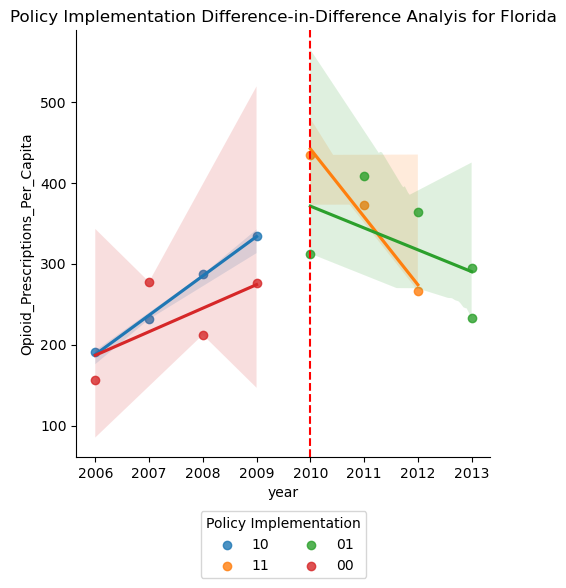

In [140]:
plot = sns.lmplot(
    data=result_df,
    x="year",
    y="Opioid_Prescriptions_Per_Capita",
    hue="hue_separator",
    legend=False,
)
plot.set(title=f"Policy Implementation Difference-in-Difference Analyis for Florida")

plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.3),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Opioid_Prescriptions_Per_Capita")

/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(-6.359374999999991, 0.5, 'Mortality Rate Per-Capita')

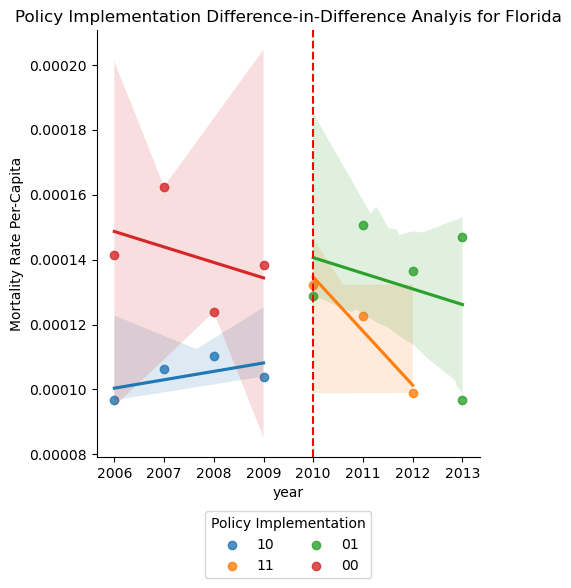

In [141]:
plot = sns.lmplot(
    data=result_df,
    x="year",
    y="Mortality_rate_from_Drug_Overdoses_Per_Capita",
    hue="hue_separator",
    legend=False,
)
plot.set(title=f"Policy Implementation Difference-in-Difference Analyis for Florida")

plt.legend(
    loc="lower center",
    bbox_to_anchor=(0.5, -0.3),
    title="Policy Implementation",
    ncol=2,
)

ax = plot.axes[0, 0]

ax.axvline(policy_year, ls="--", color="red")
ax.set_ylabel("Mortality Rate Per-Capita")

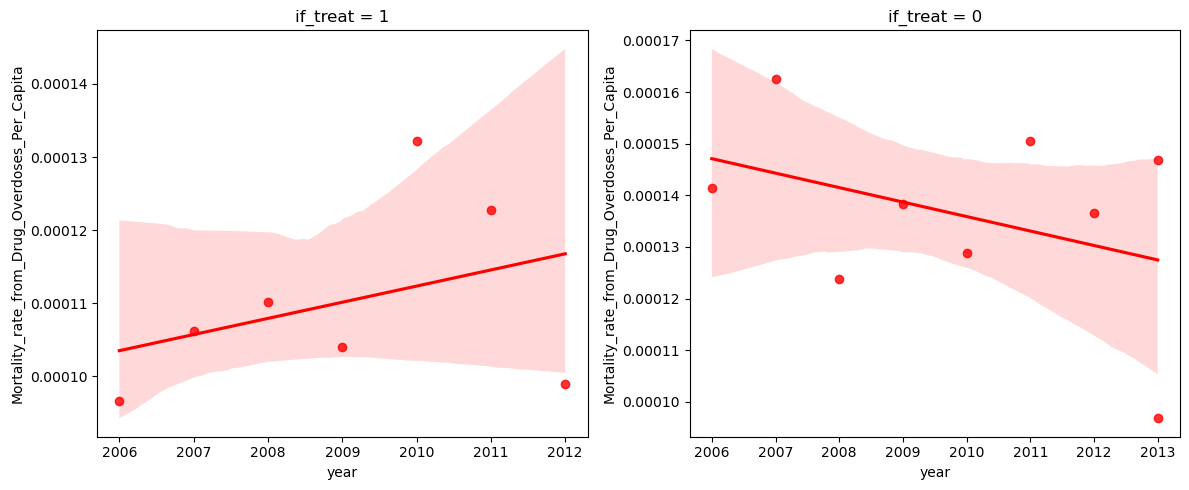

In [121]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# # Create a subplot with 1 row and 2 columns
# plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
# plt.subplot(1, 2, 1)  # First subplot
# sns.plot(
#     data=result_df[result_df["if_treat"] == 1],
#     x="year",
#     y="Mortality_rate_from_Drug_Overdoses_Per_Capita",
#     scatter=False,
#     color="red",
# )
# plt.title("if_treat = 1")

# plt.subplot(1, 2, 2)  # Second subplot
# sns.plot(
#     data=result_df[result_df["if_treat"] == 0],
#     x="year",
#     y="Mortality_rate_from_Drug_Overdoses_Per_Capita",
#     scatter=False,
#     color="red",
# )
# plt.title("if_treat = 0")

# plt.tight_layout()  # Adjust the layout for better spacing
# plt.show()

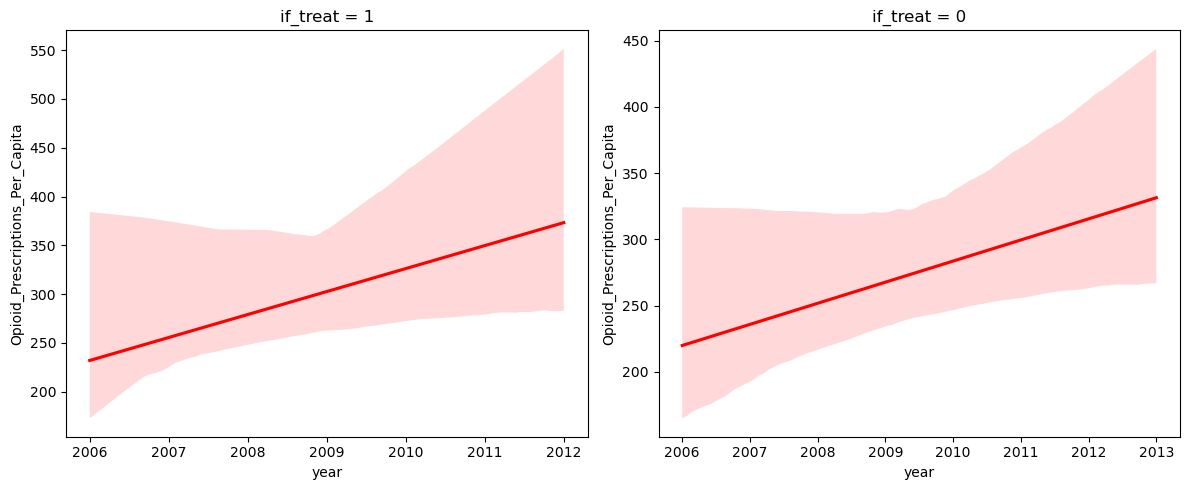

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed
plt.subplot(1, 2, 1)  # First subplot
sns.regplot(
    data=result_df[result_df["if_treat"] == 1],
    x="year",
    y="Opioid_Prescriptions_Per_Capita",
    scatter=False,
    color="red",
)
plt.title("if_treat = 1")

plt.subplot(1, 2, 2)  # Second subplot
sns.regplot(
    data=result_df[result_df["if_treat"] == 0],
    x="year",
    y="Opioid_Prescriptions_Per_Capita",
    scatter=False,
    color="red",
)
plt.title("if_treat = 0")

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()

In [79]:
from statsmodels.formula.api import ols
import seaborn.objects as so
import matplotlib.pyplot as plt
from matplotlib import style

model_presciptions = ols(
    "Opioid_Prescriptions_Per_Capita ~ if_effect + if_treat + if_effect:if_treat",
    result_df,
).fit()
print(model_presciptions.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Opioid_Prescriptions_Per_Capita   R-squared:                       0.287
Model:                                         OLS   Adj. R-squared:                  0.073
Method:                              Least Squares   F-statistic:                     1.342
Date:                             Mon, 27 Nov 2023   Prob (F-statistic):              0.316
Time:                                     19:33:22   Log-Likelihood:                -75.958
No. Observations:                               14   AIC:                             159.9
Df Residuals:                                   10   BIC:                             162.5
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      

/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [81]:
model_motality = ols(
    "Mortality_rate_from_Drug_Overdoses_Per_Capita ~ if_effect + if_treat + if_effect:if_treat",
    result_df,
).fit()
print(model_motality.summary())

                                          OLS Regression Results                                         
Dep. Variable:     Mortality_rate_from_Drug_Overdoses_Per_Capita   R-squared:                       0.630
Model:                                                       OLS   Adj. R-squared:                  0.519
Method:                                            Least Squares   F-statistic:                     5.678
Date:                                           Mon, 27 Nov 2023   Prob (F-statistic):             0.0156
Time:                                                   19:33:30   Log-Likelihood:                 138.82
No. Observations:                                             14   AIC:                            -269.6
Df Residuals:                                                 10   BIC:                            -267.1
Df Model:                                                      3                                         
Covariance Type:                              

/Users/meixiangdu/miniconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Axes: xlabel='year', ylabel='Opioid_Prescriptions_Per_Capita'>

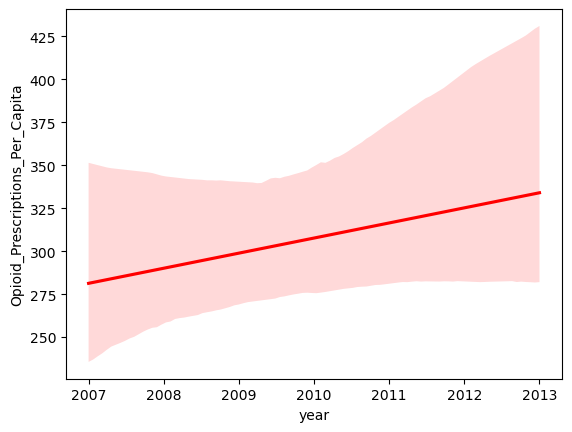

In [97]:
import seaborn as sns

control_df = result_df[result_df["if_treat"] == 0]
sns.regplot(
    data=result_df,
    x="year",
    y="Opioid_Prescriptions_Per_Capita",
    scatter=False,
    color="red",
)

<Axes: xlabel='year', ylabel='Mortality_rate_from_Drug_Overdoses_Per_Capita'>

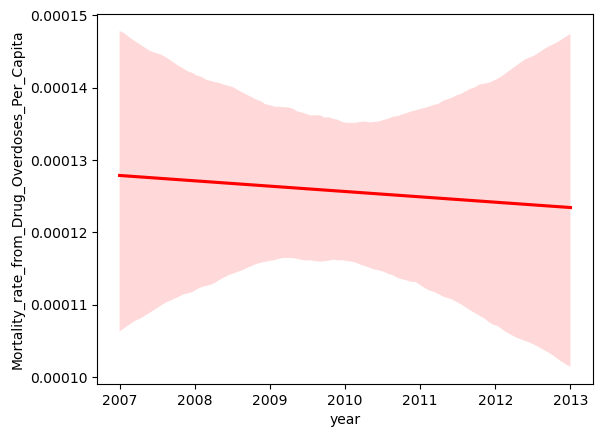

In [95]:
sns.regplot(
    data=result_df,
    x="year",
    y="Mortality_rate_from_Drug_Overdoses_Per_Capita",
    scatter=False,
    color="red",
)